In [1]:
#1. Introduction 
#in this notebook we will explore a dataset of over 2,000 rows
# the goal is to pratice data anaktics using python and create a clean project
#we will clean the data,perform EDA and generate insight

In [3]:
#2. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

In [4]:
#setting
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [5]:
#3. load dataset
df = pd.read_csv('/kaggle/input/books-dataset/Books.csv')

In [6]:
# quick look at the data
#ดูข้อมูลภาพรวมdata
df.head()


,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
3,Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...


In [7]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2049 non-null   object
 1   author          2049 non-null   object
 2   pages           2049 non-null   object
 3   genre           2049 non-null   object
 4   description     2049 non-null   object
 5   published_date  2049 non-null   object
 6   publisher       2049 non-null   object
 7   language        2049 non-null   object
 8   average_rating  2049 non-null   object
 9   ratings_count   2049 non-null   int64 
 10  thumbnail       2049 non-null   object
dtypes: int64(1), object(10)
memory usage: 176.2+ KB


In [8]:
#4. intitial cleaning x
#convert 'page' to numeric

df['pages'] = pd.to_numeric(df['pages'],errors  = 'coerce')

In [9]:
#clean 'aveage_rating'
df = df[df['average_rating']!= 'No rating']
df['average_rating']=pd.to_numeric(df['average_rating'],errors='coerce')

In [10]:
#convert 'publish date' to data type แบบ date time จาก object
#เปลี่ยนวันตีพิมเป็น date time ถ้าเจอ error ก็ให้ทำไปเลย
#convert ให้มันดูเป็นปีแทน
df['published_date'] = pd.to_datetime(df['published_date'],errors = 'coerce')
df['published_year'] = df['published_date'].dt.year

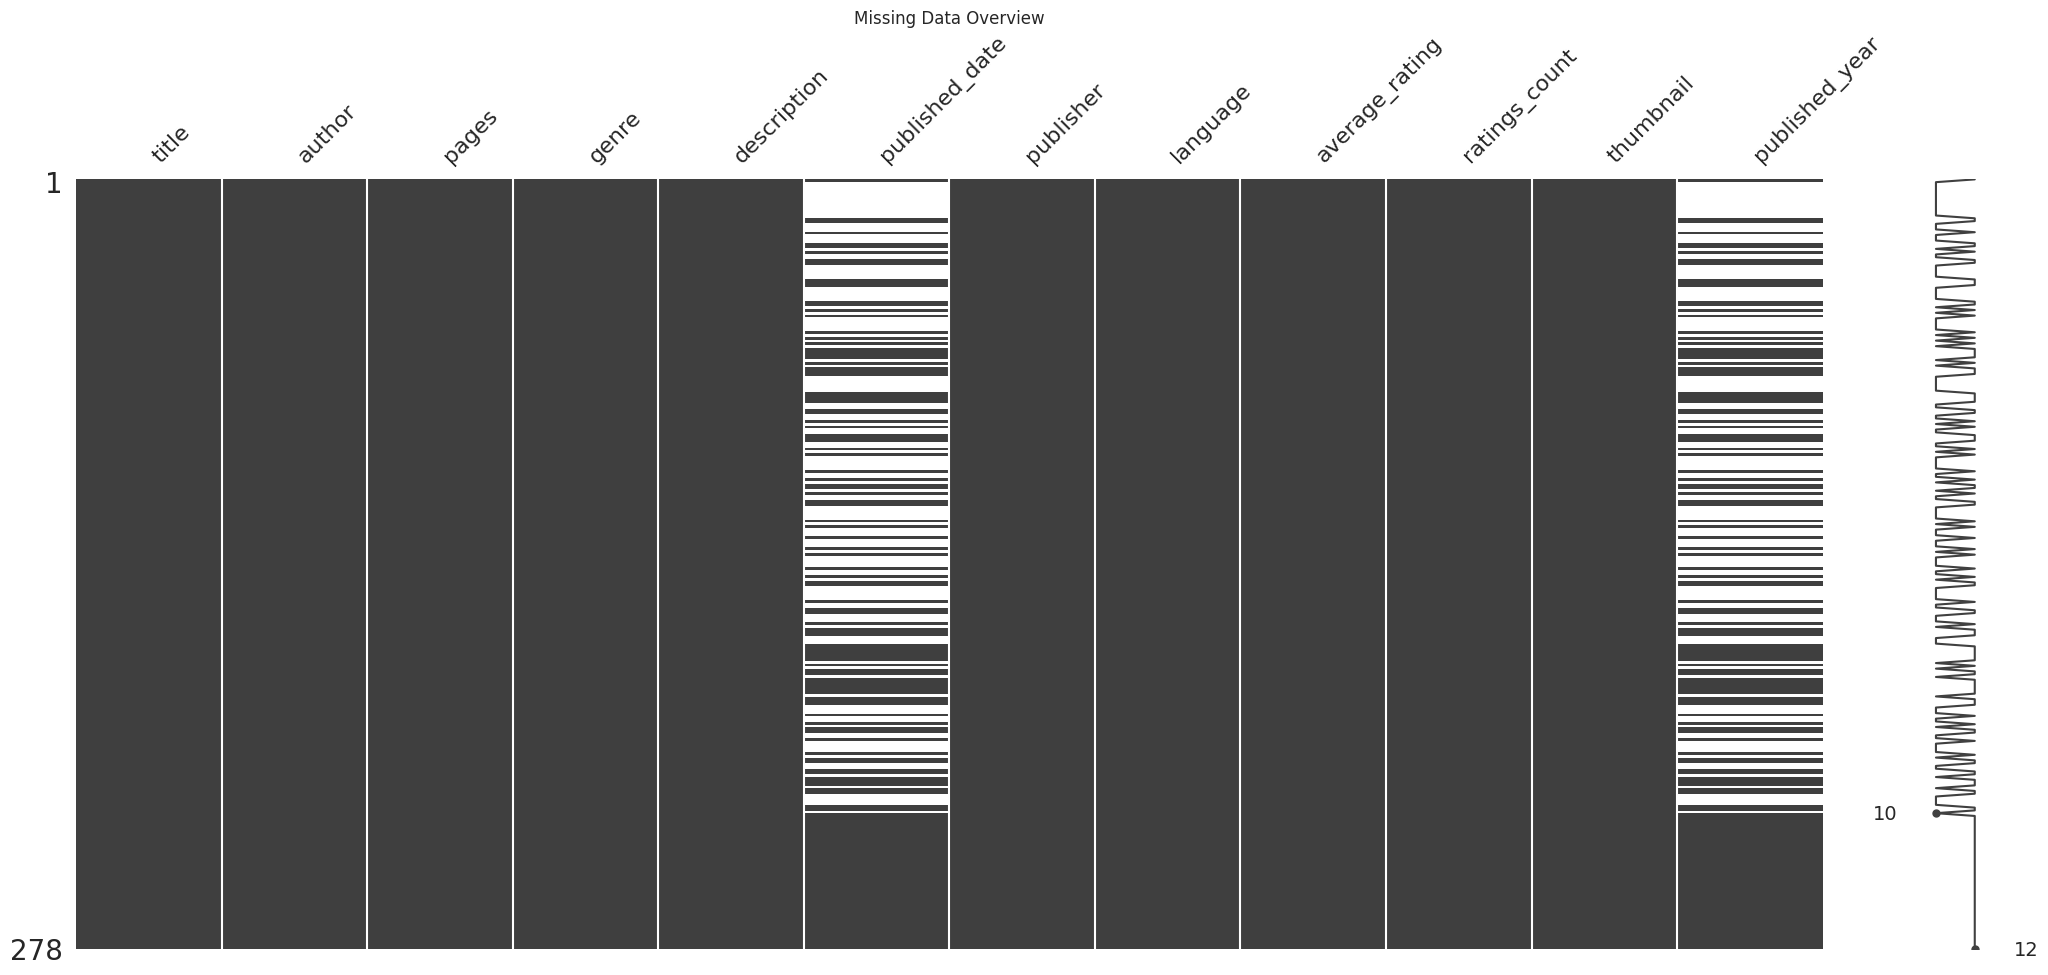

In [11]:
#check for missong data โดยใช้ msno
msno.matrix(df)
plt.title('Missing Data Overview')
plt.show()

In [12]:
df['published_date']

12     2014-04-08
31            NaT
40            NaT
41            NaT
42            NaT
          ...    
2044   2016-01-05
2045   2001-04-01
2046   2004-12-28
2047   1999-03-01
2048   2023-05-16
Name: published_date, Length: 278, dtype: datetime64[ns]

In [13]:
#drop columns not useful for analysis (เอา tumbnails ออก)
df = df.drop(columns = ['thumbnail'])

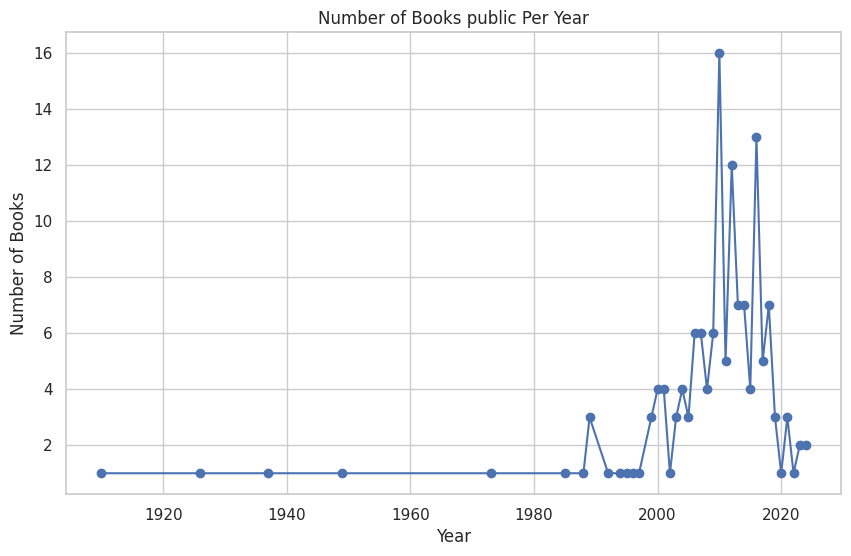

In [14]:
#5.  EDA

#number of books per year

books_per_year = df['published_year'].value_counts().sort_index()
books_per_year.plot(kind = 'line',marker = 'o',title = 'Number of Books public Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

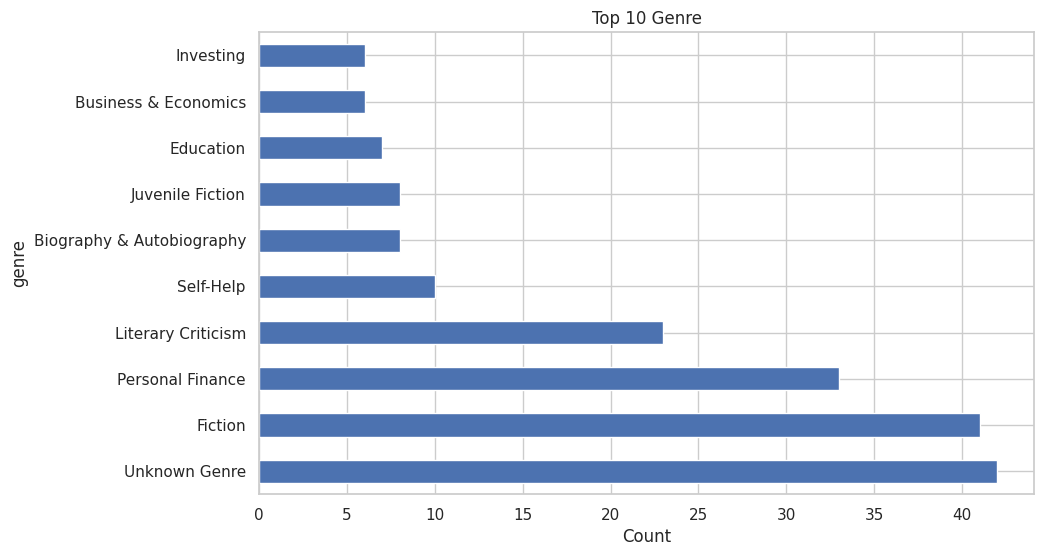

In [15]:
#most common genres
#หนังสือประเภทไหนมีมากที่สุด
df['genre'].value_counts().head(10).plot(kind = 'barh',title = 'Top 10 Genre')
plt.xlabel('Count')
plt.show()

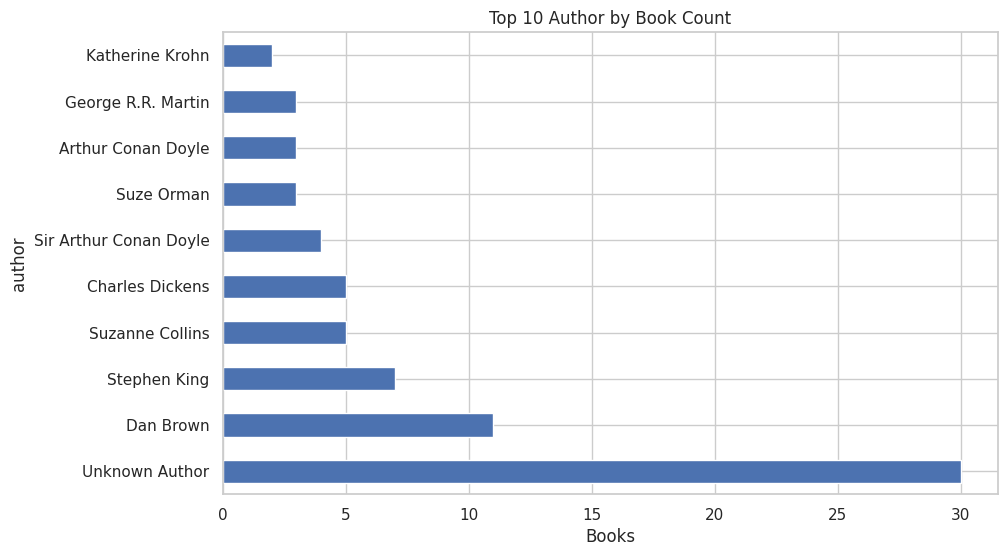

In [16]:
#top authors by number of books
df['author'].value_counts().head(10).plot(kind = 'barh',title = 'Top 10 Author by Book Count')
plt.xlabel('Books')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


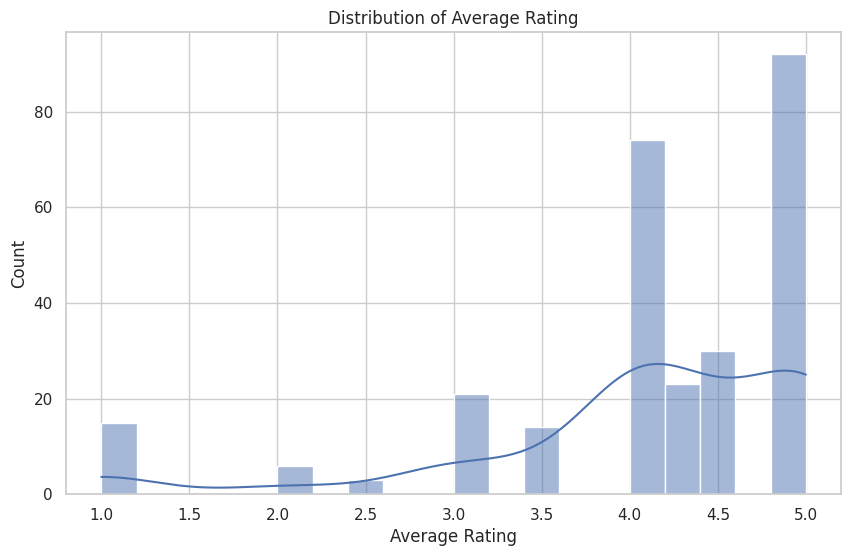

In [18]:
#Distribution of average rating bins คือทั้งหมดที่เอามาของข้อมูล
#การกระจายตัวของ rating หนังสือที่ขายได้
#kde เป็นเส้น
sns.histplot(df['average_rating'],bins = 20,kde = True)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.show()

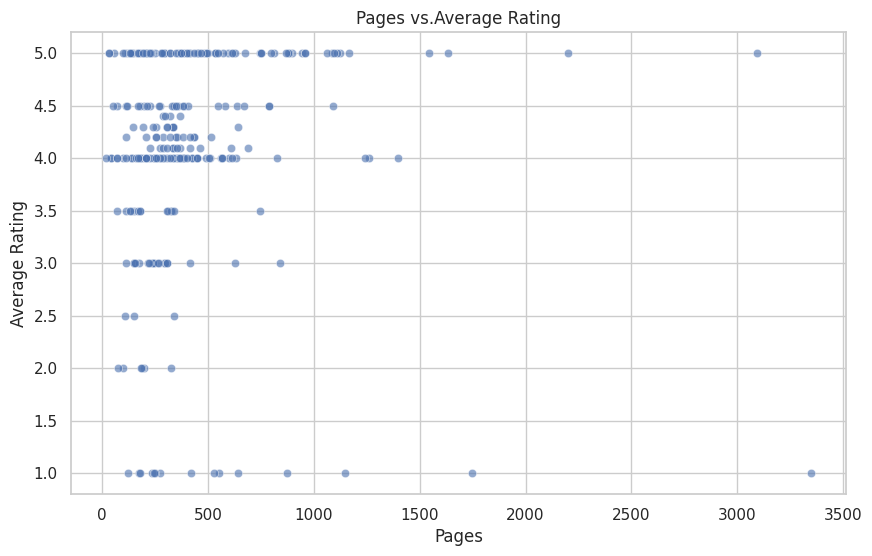

In [19]:
#Page vs Rating แบบถ้าจำนวนหน้าเยอะแล้วRatingจะสูงตามมั้ย ทั้งสอง correrationกันมั้ย
sns.scatterplot(data = df , x = 'pages' , y = 'average_rating',alpha = 0.6)
plt.title('Pages vs.Average Rating')
plt.xlabel('Pages')
plt.ylabel('Average Rating')
plt.show()

In [20]:
#Highly rate that books with enough reviews
#อยากรู้แค่ว่ามี rating สูงๆ คือมีจำนวน reviews เท่าไหร่
top_books = df[df['ratings_count'] > 50 ].sort_values(by = 'average_rating',ascending = False).head(10)
top_books[['title','author','average_rating','ratings_count']]

,title,author,average_rating,ratings_count
1019,Adventures of Sherlock Holmes,Sir Arthur Conan Doyle,4.5,486
1020,The Hunger Games,Suzanne Collins,4.5,333
2017,The Barefoot Investor,Scott Pape,4.4,100000
2012,The Simple Path to Wealth,JL Collins,4.4,80000
2008,Atomic Habits,James Clear,4.4,700000
2013,Get Good with Money,Tiffany Aliche,4.4,50000
2040,The Wealth Choice,Dennis Kimbro,4.3,20000
2015,The Millionaire Fastlane,MJ DeMarco,4.3,90000
2036,The Compound Effect,Darren Hardy,4.3,90000
2009,The Richest Man in Babylon,George S. Clason,4.3,400000


In [21]:
#สรุปที่เห็น ratings_count ส่วนใหญ่มีการกระจายตัว คือเราอยากดูว่าหนังสือที่รีวิวสูงๆนั้นมีจำนวนคนรีวิวเท่าไหร่
#โดยมีเกณฑ์คือ 50 รีวิว ขั้นต่ำ

In [22]:
#สรุป
#Key insight
#1. Most books were published between 1990 and 2015
#2. Fiction and referrence are the most common genes ไม่นับรวมไม่มีคน
#3. Books with more pages do not neccessarily receive higher rating
#4. Some authors consistently produce high-rate books

In [23]:
#Recommendation 
#Publishers could invest more in genre that how high engagement
#Adding more user reviews and rating could provide better insight into popularity

In [ ]:
#Conclusion
#This is show the pipeline from data cleaning to insight generation by using Python